# 2. Extracting Text from PDF using Python

A reason that Python is such a popular programming language is because the community has created packages (programs) for almost anything you can think of. 

In this notebook, we will be using a python package that allows the user to extract text from PDFs. 

------------------

## Preamble: Download this Google Colab Notebook to your Google Drive

It is possible to save a copy of this Google Colab notebook to your Google Drive. This is useful if you would like to write notes, or to make changes or additions to the code in this notebook. 

**IF YOU WOULD LIKE to save a copy of this notebook to your Google Drive before beginning**, do the following: 

1. Click the copy_to_drive.png button at the top of the Google Colab webpage.
2. A message may appear that says Google Colab wants to open the copied Google Colab notebook in a new tab. Click the button that says open the copied notebook in a new tab if this comes up. 
3. **Quit the original tab with the original Google Colab notebook** so that we dont get mixed up with notebooks. 

You can find this notebook in your Google Drive, in a folder called ```Colab Notebooks```. 

**IF YOU DO NOT want to save a copy of this notebook to your Google Drive**, take note that you will get the following message when your begin to run code in this notebook (see below). **When this comes up, click the** ```Run anyway``` **button to allow the code to run**.

<center><img src=https://raw.githubusercontent.com/geoffreyweal/Literature_Mining_Tutorial/main/Notebooks/images/Running_notebook_from_github.png width="500"></center>


We are now ready to run this Google Colab Notebook. 

------------------

## 1. Copying PDF files into Google Colabs

**To begin**, we need to copy the PDF files that we obtained from the previous notebook into this notebook. To do this, **click the** Files **folder icon to the left of the Google Colab page**.

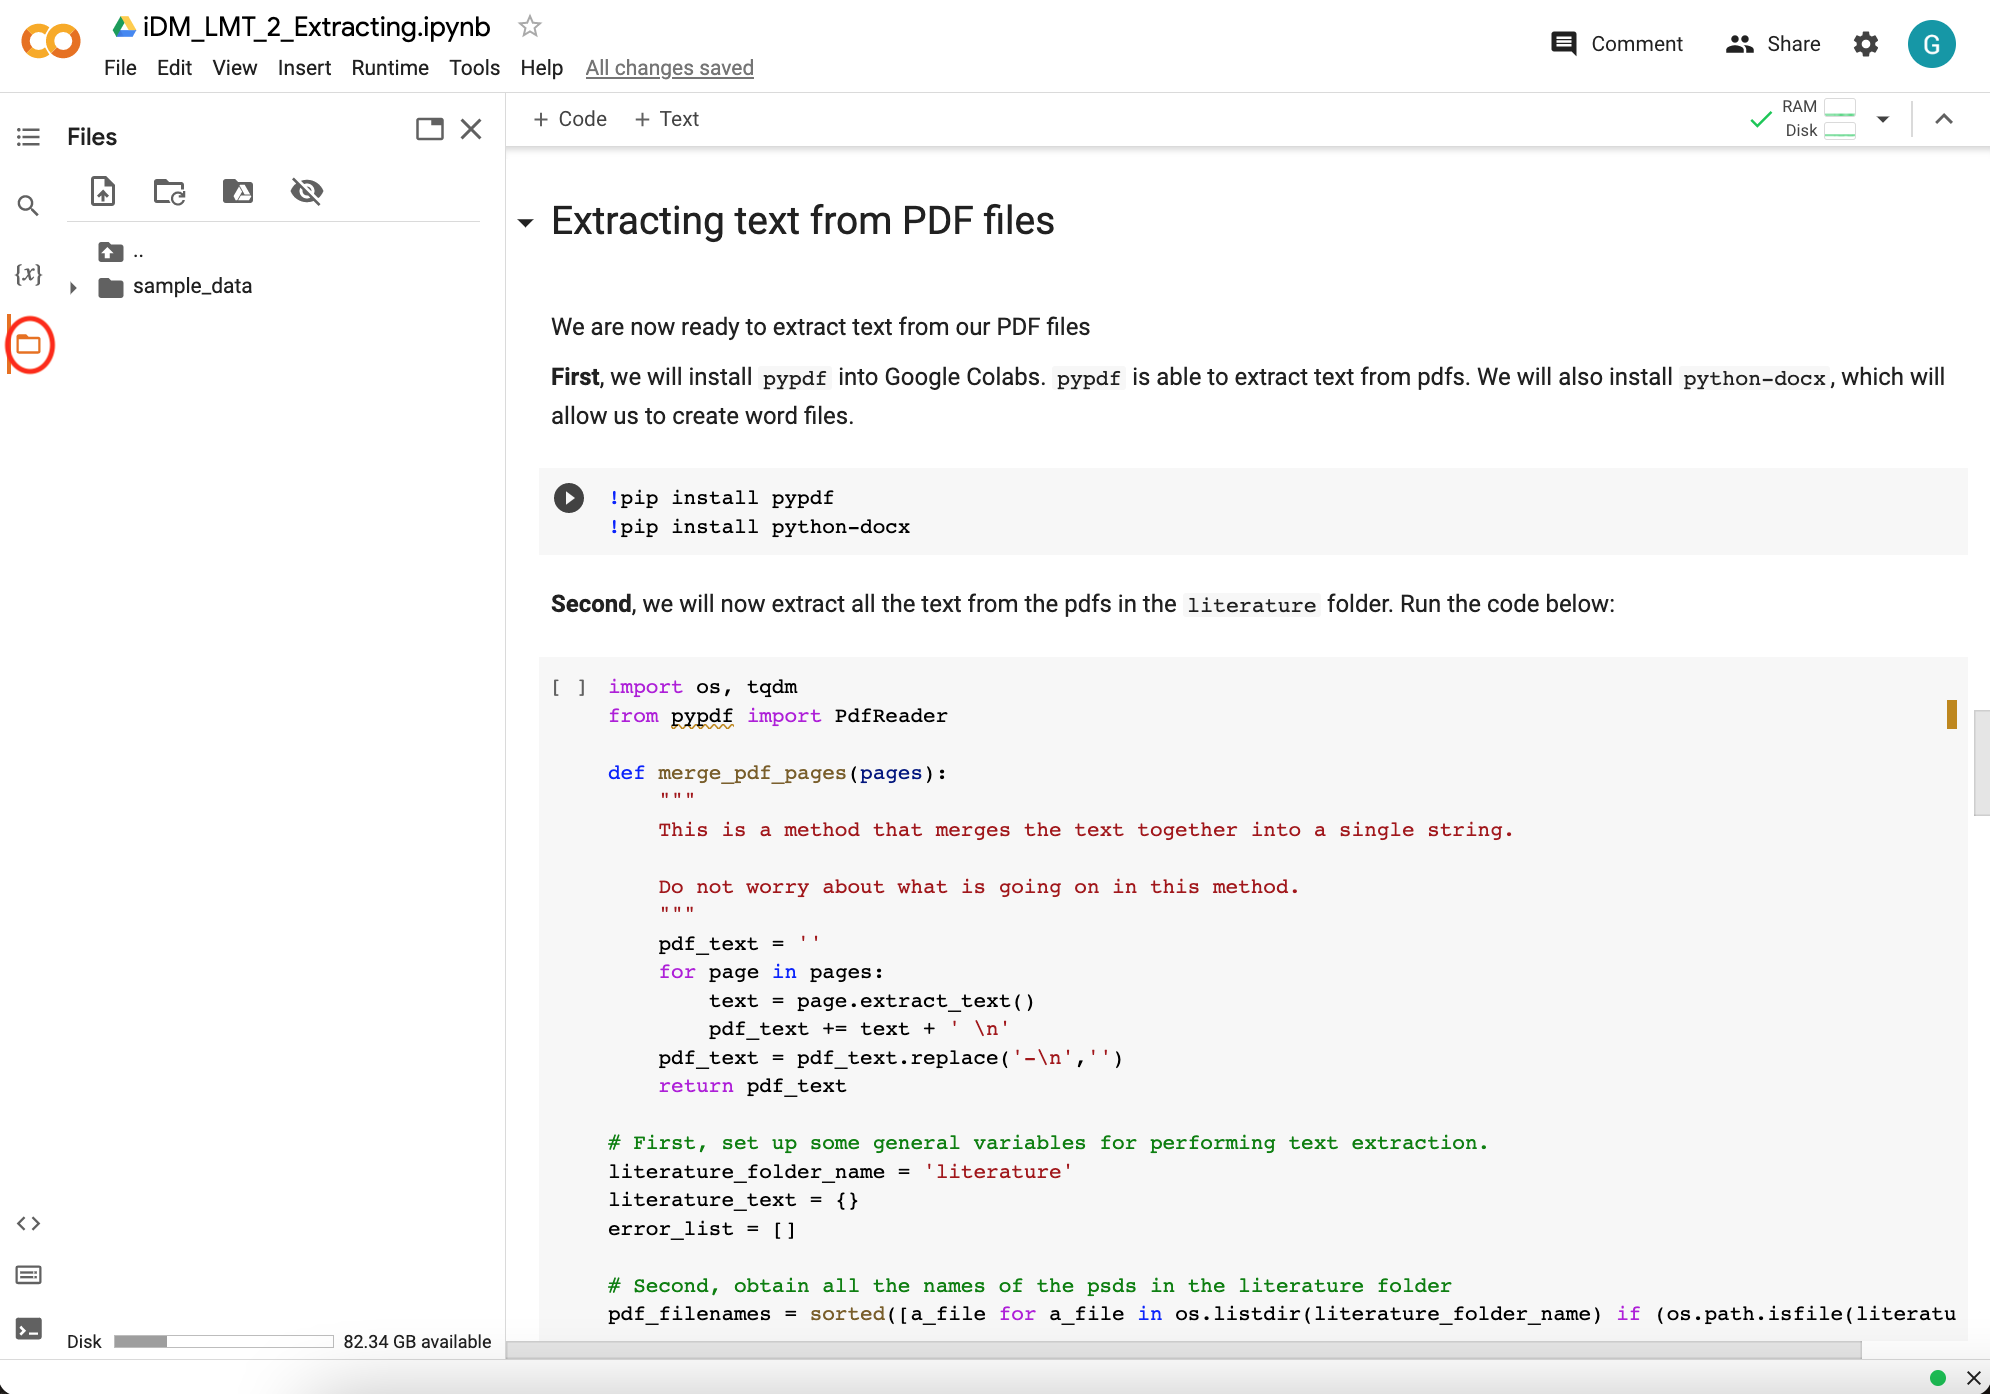

This will show all the files and folders that we can work with. 

**Second**, we also need to move our "terminal" here as well. To do this, **we will run** ```os.chdir('/content')``` **line of code below**:



In [ ]:
import os, shutil
os.chdir('/content')

We can check that our "terminal" is here as well by running the code below. You should be able to see the ```sample_data``` folder included in this list. 

In [ ]:
os.listdir('.')

**Third**, we want to copy all the pdf files that you downloaded from Scopus into Google Colab. To do this, **click the** upload.png **upload button, move into the** ```literature``` **folder that contains the PDF files, select all the PDF files, and upload your PDFs by clicking the** ```open``` **button**. 

NOTE: If you could not obtain papers or download the ```literature.zip``` file from the ```iDM_LMT_1_Gathering_Literature.ipynb``` notebook, download an example of ```literature.zip``` by [clicking here](https://github.com/geoffreyweal/Literature_Mining_Tutorial/raw/main/Notebooks/literature.zip). 

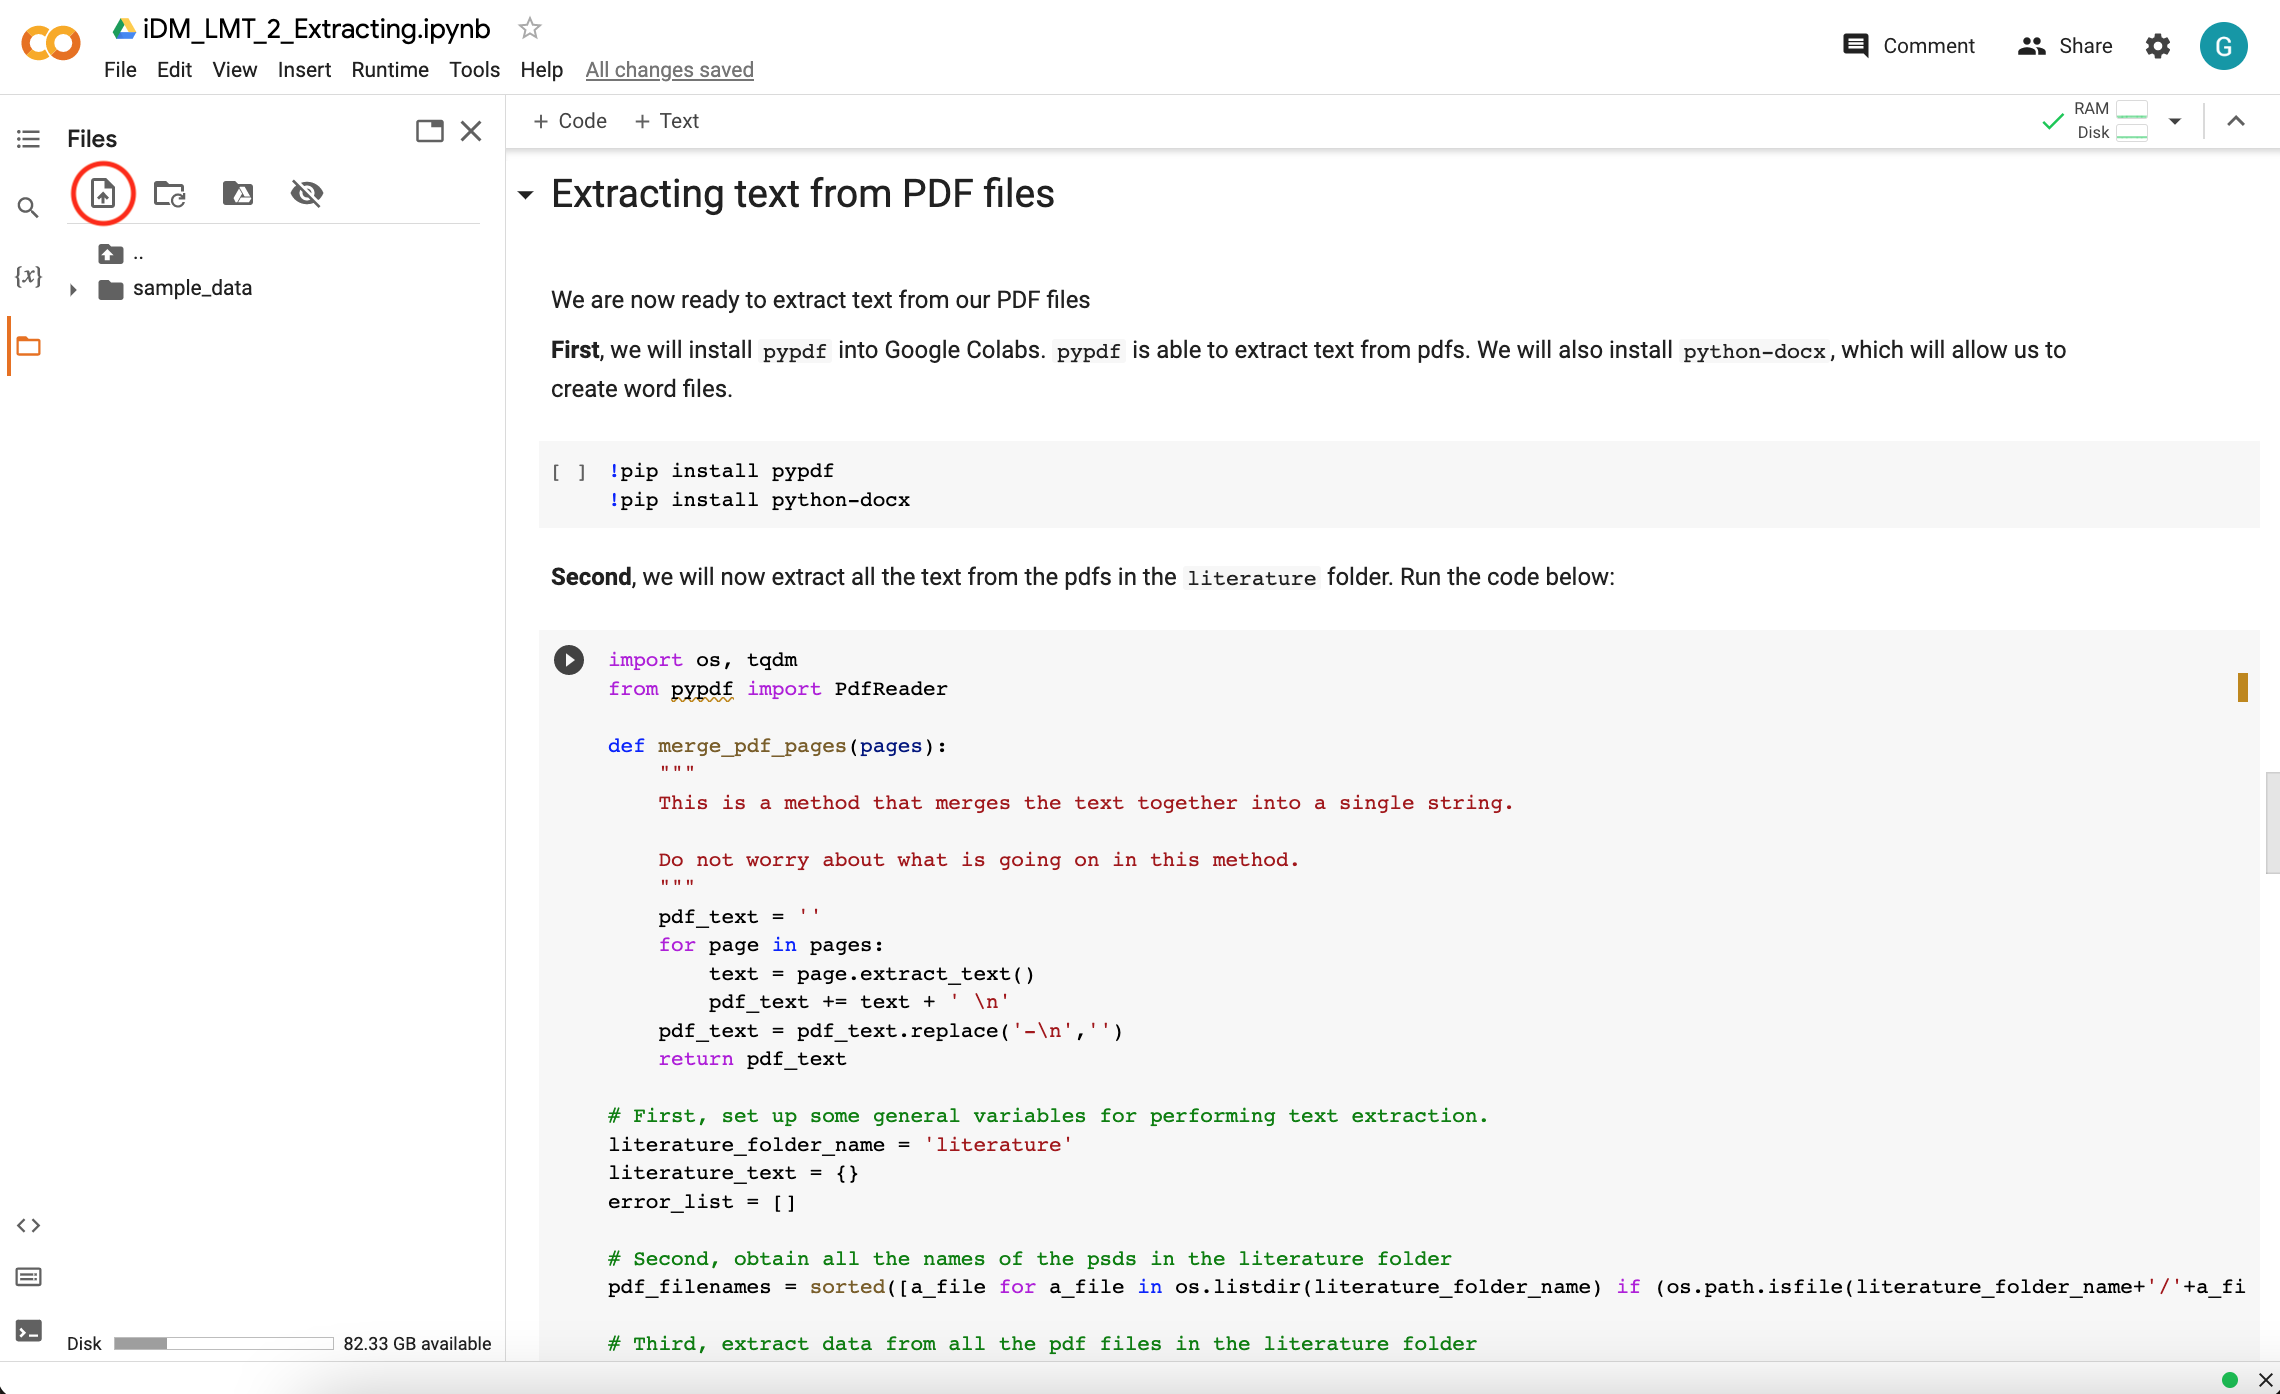

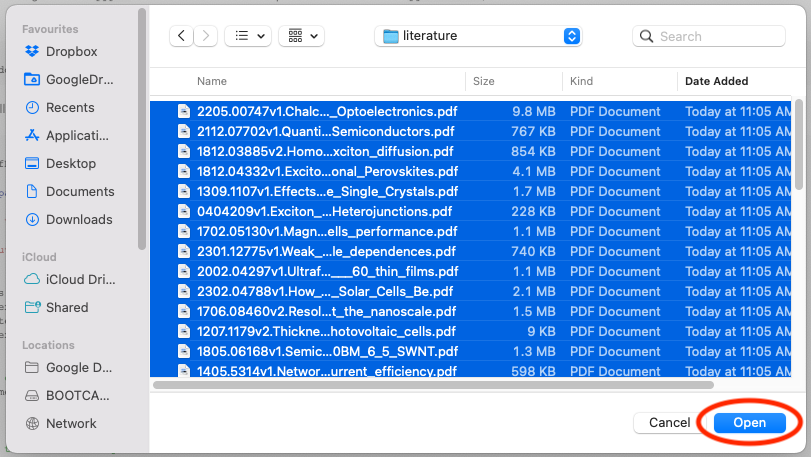

You may see this message once you press ```Open```

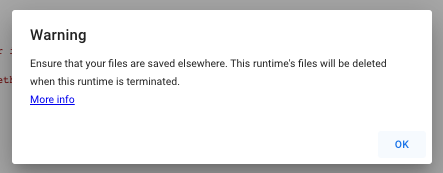

You will see your PDF files being uploaded in the ```Files``` column

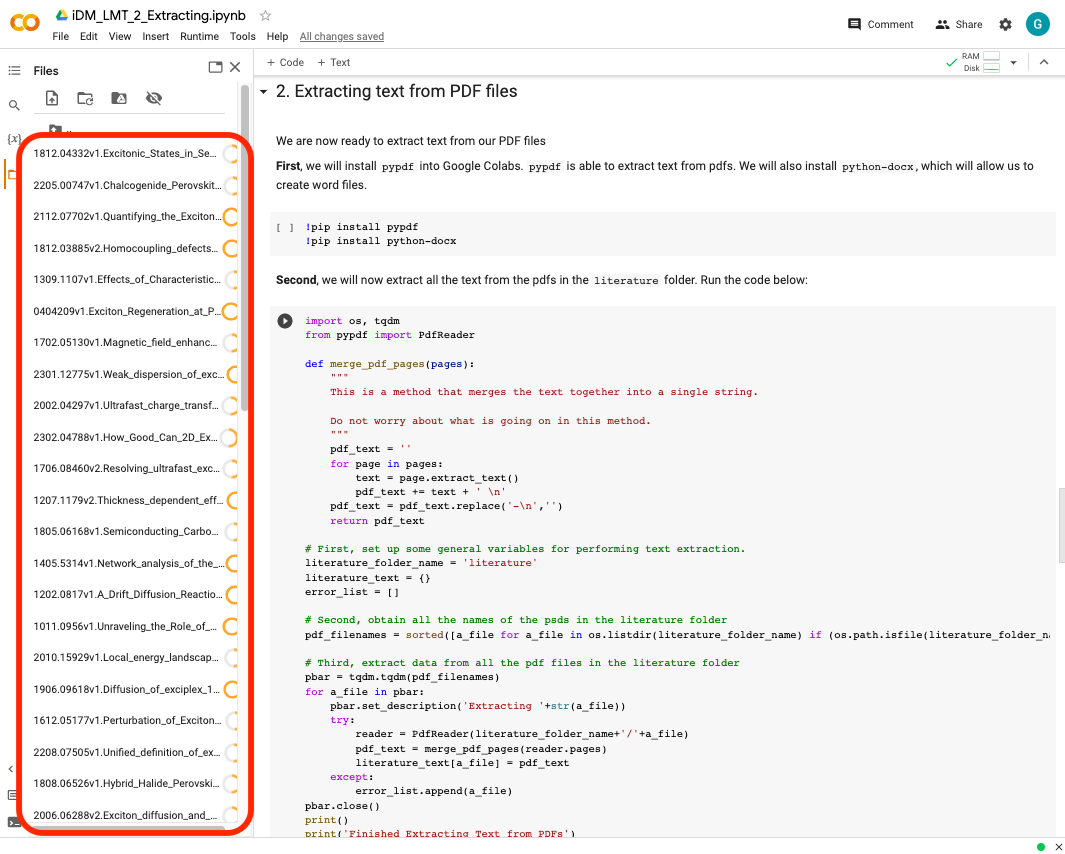

**Wait until ALL the PDFs have been uploaded**. This is complete when you see no PDF file with circles next to them. 

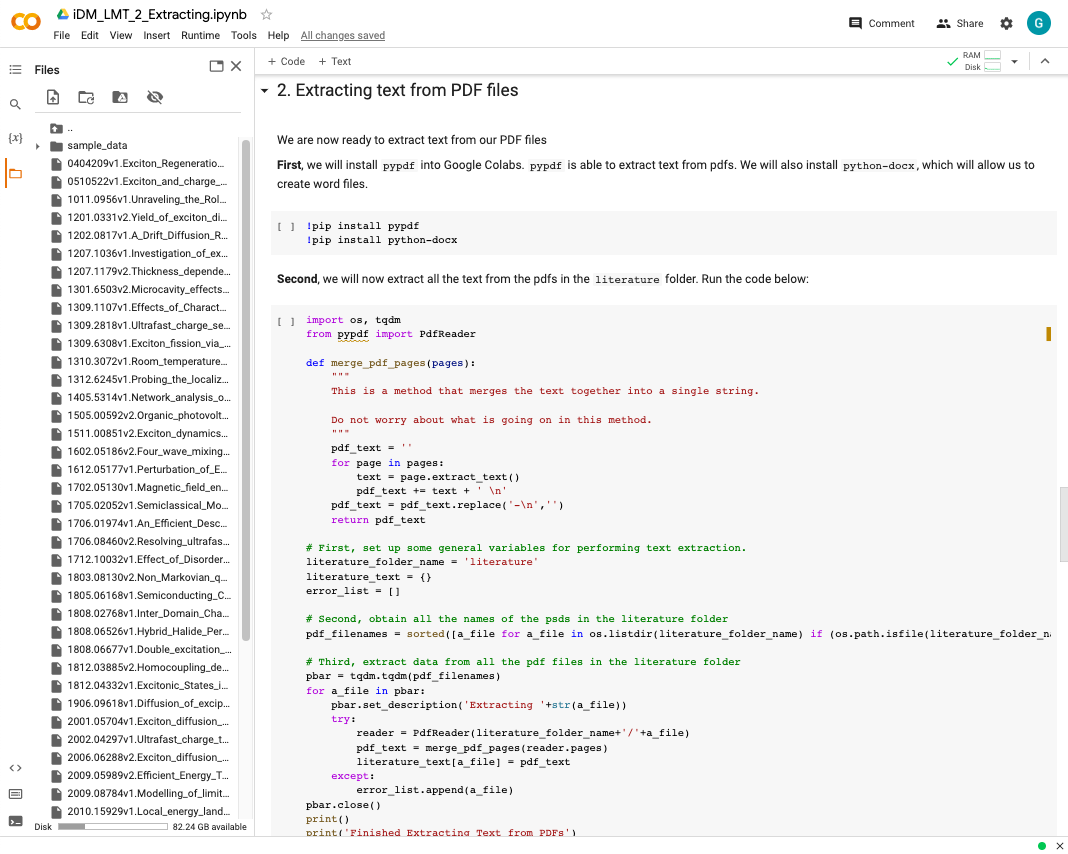

Your PDFs will be uploaded to Google Colabs. **Wait until ALL the PDFs have been uploaded to Google Colabs**

---



**Once all the PDFs have been uploaded, you can run the code below**. This will move all the PDFs you have copied to Google Colabs into a new folder called ```literature```. 

In [ ]:
import tqdm

# First, make a folder called literature if it does not already exist
literature_folder_name = 'literature'
if not os.path.exists(literature_folder_name):
    os.makedirs(literature_folder_name)

# Second, move all pdf files into the literature folder
pdf_fileanmes = sorted([a_file for a_file in os.listdir(".") if (os.path.isfile(a_file) and a_file.endswith('.pdf'))])
if len(pdf_fileanmes) > 0:
    pbar = tqdm.tqdm(pdf_fileanmes)
    for a_file in pbar:
        pbar.set_description('Moving '+str(a_file))
        shutil.move(a_file, literature_folder_name+'/'+a_file)
else:
    print('There were no pdfs to move to the '+str(literature_folder_name)+' folder.')

If you click the refresh.png refresh button, you will see all the PDFs have disappeared and a ```literature``` folder has appeared. If you click on the ```literature``` folder, it will contain the PDFs you uploaded to Google Colabs.

## 2. Extracting Text from PDF files

We are now ready to extract text from our PDF files

**First**, we will install ```pypdf``` into Google Colabs. ```pypdf``` is a Python program that is able to extract text from pdfs. We will also install ```python-docx```, which will allow us to create word files. 

In [ ]:
!pip install pypdf python-docx

**Second**, we will now extract all the text from the PDFs in the ```literature``` folder. **Run the code below**:

In [ ]:
import os, tqdm
from pypdf import PdfReader

def merge_pdf_pages(pages):
    """
    This is a method that merges the text together into a single string. 
    
    Do not worry about what is going on in this method.
    """
    pdf_text = ''
    for page in pages:
        text = page.extract_text()
        pdf_text += text + ' \n'
    pdf_text = pdf_text.replace('-\n','')
    return pdf_text

# First, set up some general variables for performing text extraction.
literature_folder_name = 'literature'
literature_text = {}
error_list = []

# Second, obtain all the names of the psds in the literature folder
pdf_filenames = sorted([a_file for a_file in os.listdir(literature_folder_name) if (os.path.isfile(literature_folder_name+'/'+a_file) and a_file.endswith('.pdf'))])

# Third, extract data from all the pdf files in the literature folder
pbar = tqdm.tqdm(pdf_filenames)
for a_file in pbar:
    pbar.set_description('Extracting '+str(a_file))
    try:
        reader = PdfReader(literature_folder_name+'/'+a_file)
        pdf_text = merge_pdf_pages(reader.pages)
        literature_text[a_file] = pdf_text
    except:
        error_list.append(a_file)
pbar.close()
print()
print('Finished Extracting Text from PDFs')

# Fourth, indicate if there were any problems with extracting text from pdfs
if len(error_list) > 0:
    print('=========================================')
    print('The following pdfs could not have text extracted from them:')
    print()
    for error_file in error_list:
        print(error_file)
    print('=========================================')
else:
    print('Text could be extracted from all pdfs with no problems.')

**We have now extracted the text in the PDFs**! Now let's do stuff with it.

**Third**, let's scan the literature for keywords we are interested in. **Run the code below to create the keywords list**. 

In [ ]:
keywords = ['exciton', 'diffusion', 'coefficient']

Now let's scan the literature for these keywords. **Run the code below to locate all the keywords in each PDF**.




In [ ]:
import re
from docx import Document
from docx.enum.text import WD_ALIGN_PARAGRAPH

def find_keywords(pdf_text, keywords):
    """
    This method is designed to locate all the keywords in a string of text.
    """
    all_keyword_indices_in_text = []
    for keyword in keywords:
        all_keyword_indices_in_text += [(m.start(), m.end()) for m in re.finditer(keyword, pdf_text)]
    return sorted(all_keyword_indices_in_text)

# First, set up some general variables for recording data about keywords
keywords_in_literature_text = {pdf_filename: None for pdf_filename in literature_text.keys()}

# Second, determine all the places in the PDF where keywords are found. 
pbar = tqdm.tqdm(sorted(literature_text.items()))
for pdf_filename, pdf_text in pbar:
    pbar.set_description('Analysing Keywords in '+str(pdf_filename))
    all_keyword_indices_in_text = find_keywords(pdf_text,keywords)
    keywords_in_literature_text[pdf_filename] = all_keyword_indices_in_text
pbar.close()
print()
print('Finished Identifying Keywords from PDFs')

**We have now analysed each PDF**. **We can now do stuff with this data**. 

For example, maybe we want to create a file that contains the brief sentence surrounding each of the keywords of interest. This may be useful if we are wanting to quickly identify key information from the literature based on the keywords of interest.

**Fourth, Run the code below to create word files that contain snippets of text where the keywords of interest appear**

In [ ]:
def already_been_printed(phsi, phei, printed_segments):
    """
    This method is used to determine what has already been printed. 

    Do not worry about what is going on in this method.
    """
    for start_index, end_index in printed_segments:
        if (start_index <= phsi <= end_index) and (start_index <= phei <= end_index):
            return True
    return False

# First, set up some general variables for running this script
literature_keyword_summary_name = 'literature_keyword_summary'
print_hangover_no = 200 # This can be modified as you wish

# Second, create a new folder to save keyword summary docx files to.
if not os.path.exists(literature_keyword_summary_name):
    os.makedirs(literature_keyword_summary_name)

# Third, print what the keywords that will be searched for in this script.
print('##################################')
print('keywords: '+str(keywords))
print('##################################')

# Fourth, save the summary of keywords found in the text into docx files.
pbar = tqdm.tqdm(sorted(literature_text.keys()))
for pdf_filename in pbar:

    # 4.1: Create the word document. 
    docx_filename = pdf_filename.replace('.pdf','.docx')
    pbar.set_description('Saving to file: '+str(docx_filename))
    document = Document()
    document.add_heading(pdf_filename)
    document.add_paragraph()

    # 4.2: Collect the text from the pdf, and the positions of keywords identified in the text
    pdf_text = literature_text[pdf_filename]
    all_keyword_indices_in_text = keywords_in_literature_text[pdf_filename]

    # 4.3: Write all the summaries involving keywords from the pdf into the docx file
    printed_segments = []
    for start_index, end_index in all_keyword_indices_in_text:
        phsi = start_index - print_hangover_no
        if phsi < 0:
            phsi = 0
        phei = end_index + print_hangover_no
        if phei > (len(pdf_text)-1):
            phei = len(pdf_text)-1
        if already_been_printed(phsi, phei, printed_segments):
            continue
        else:
            printed_segments.append((phsi,phei))
        insept_in_text = pdf_text[phsi:phei]
        insept_in_text = insept_in_text.replace('\n',' ')
        paragraph = document.add_paragraph()
        paragraph.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY
        for word in insept_in_text.split():
            try:
                run = paragraph.add_run(word+' ')
            except Exception as exception:
                continue
            if any([(keyword in word) for keyword in keywords]):
                run.bold = True

    # 4.4: Save the docx file
    document.save(literature_keyword_summary_name+'/'+docx_filename)
pbar.close()
print()
print('Finished Saving the DOCX files contains summaries of keywords')

If you click the refresh.png refresh button, you will see a new ```literature_keyword_summary``` folder. This folder contains docx files that contain segments of the paper that include the keywords of interest. 

**Fifth**, we can now convert this ```literature_keyword_summary``` folder into a zip file and download it. **Run the code below**

**NOTE**: It may take time to download the ```literature_keyword_summary.zip``` file to your computer.

In [ ]:
!zip -r literature_keyword_summary.zip literature_keyword_summary > .output.txt
from google.colab import files
files.download('literature_keyword_summary.zip') 

You will now have downloaded a zip file called ```literature_keyword_summary.zip```. If you open this zip file, you will see it contains many word files, all of which contain snippets of each pdf file. 

**Once you have completed this**, move on to the ```iDM_LMT_3_Highlighting.ipynb``` notebook, called ```Highlighting Keywords in PDFs using Python```

### Limitations to Extracting text from PDF Files

ADD HERE